## Task 1

### Write a Python function  that calculates and prints to the screen the square root of 2 to 100  decimal places

First we plot the function $ y = \sqrt{x}$

<function matplotlib.pyplot.show(*args, **kw)>

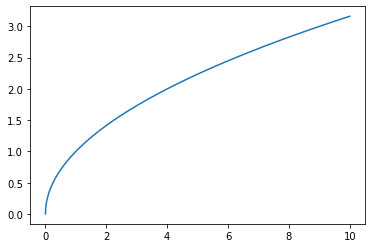

In [1]:
# plotting
import matplotlib.pyplot as plt

# numerical arrays
import numpy as np

# 1000 evenly spaced values between 0 and 10
x = np.linspace(0.0,10.0,1000)

# find square root of values and plot
y = np.sqrt(x)
plt.plot(x,y)
plt.show

We can see from the graph that $\sqrt2$ approximates to just under 1.5. This makes sense when we consider that $ (1.5)^2 = 2.25$ - slightly more than 2.

We can calculate the square root of 2 (or any number) by using Heron's method[1]. Also known as the Babylonian method, it approximates the square root, $n$ of a number $s$ using the following iterative equation[2]:
$$ x_n+1 = \frac{1}{2}(x_n + \frac{s}{x_n}) $$

When $ s = 2$ this simplifies to $ x_n+1 = \frac{x_n}{2} + \frac{1}{x_n}$
### How it works
In simple terms, if a factor, $x$,  of a particular number,$s$,  is less than the square root of $s$, then $\frac{s}{x}$ will be greater than the square root. Therefore the average of these two points will be closer to the square root than the original number, $x$. We can get very close to the square root in some cases after only a few iterations of the algorithm. Here's what happens when $x_1$ is chosen as $1$:

$$x_1 = 1$$  
$$x_2 = \frac{1}{2} + \frac{1}{1} = \frac{3}{2}$$  
$$x_2 = \frac{\frac{3}{2}}{2} + \frac{1}{\frac{3}{2}} = \frac{17}{12}$$  
$$x_4 =\frac{\frac{17}{12}}{2} + \frac{1}{\frac{17}{12}} = 1.414215... (approx)$$

This is already accurate to 4 decimal places.
I've written code to implement this method as follows:

In [2]:
def sqroot2(): 
    """
    function to calculate the square root of 2
    """

    # initial guess for the square root x
    x = 1   

     #loop until x^2 is within 0.00001 of 2 
    while  2 - (x * x) > 0.00001 or 2 - (x * x) < -0.00001:  

        # calculate a better guess for the square root
        x = (1/x) + (x/2)

    return x

In [3]:
sqroot2()

1.4142156862745097

Initially I thought that narrowing the parameters set within the while loop would allow me to get the desired accuracy, but it seems that floating point numbers in python will only allow for 16 digits of precision[3]. 
### A method that uses integers
To overcome this limitation of floating point numbers, I started thinking about how I could implement a square root function using whole numbers that would be equivalent to finding $\sqrt2$. Unlike Heron's method, the method I came up with builds $\sqrt2$, digit by digit using square numbers. It works as follows:

I find the largest number whose square is less than 2. This is clearly 1, and is the first digit of $\sqrt2$. Next I find the largest two digit number starting with 1, whose square is less than 200. This is 14, so I now have the first two digits of $\sqrt2$, namely 1 and 4. Next I find the largest 3 digit number starting with 14, whose square is less than 20000. This is 141, so now I have the first three digits - 1, 4 and 1. I continue in this vein until I have found the first 102 digits. I then insert the decimal point into the correct place and now I have 101 decimal places. I take note of the 101st place before truncating the number and rounding if necessary to finally display $\sqrt2$ to 100 decimal places. Here is my code:




In [4]:
def sqrt2(): 
    """
    function to calculate the square root of 2
    """
    n = 0 # initial value for int that will hold digits of square root 2
    
    for e in range (203): # will loop through code enough times to provide first 102 digits of square root 2
        
        # checks each digit,i, to see if the square of (n+i) is the largest square less than 2 x 10^e
        # if no value i is found, try again for next value of e
        # if suitable value for i is found, it is added to n to be used in next iteration
        # e.g. iteration 1: n=0;e=0;i=1
        #      iteration 2: n=10;e=1;i=not found
        #      iteration 3: n=10;e=2;i=4
        #      iteration 4: n=140;e=3;i=not found
        #      iteration 5: n=140;e=4;i=1
        #      iteration 6: n=1410;e=5;i=not found
        for i in range(10): 
            if ((((n + i)**2) < (2 * 10**e)) and (((n + i+1)**2)>(2 * 10**e))):
                n = (n + i) * 10   
                
                
    m = str(n)  # convert n into a string
    p = m[:1] + "." + m[1:101] # insert decimal point and truncate to 100 decimal places
    return(p) 

### Tests of the Function

In [5]:
# print out my function
print(sqrt2())

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


In [6]:
# compare value of root 2 from math library
import math
math.sqrt(2)

1.4142135623730951

These look similar. I will now check if they agree to 100 decimal places. My code outputs $\sqrt2$ as a string so i'll use the decimal library to find its value to 100 decimal places. I'll then convert to a string before comparing strings to check that they are identical. 

In [7]:
# assign output from my function to variable a
a = sqrt2()  

# use decimal library to get root 2 to 100 decimal places.
# adapted code from  https://stackoverflow.com/questions/4733173/how-can-i-show-an-irrational-number-to-100-decimal-places-in-python
from decimal import *
getcontext().prec = 101 # precision of 101 significant figures

b = str(Decimal(2).sqrt()) # get square root of 2, convert to string and assign to variable b

print(a == b)


True


The two strings are identical so I can conclude that my code does indeed find $\sqrt2$ to 100 decimal places 

### References  

[1] Extras: Heron’s Method for Computing Square Roots https://medium.com/@joshuafitzgerald/extras-herons-method-for-computing-square-roots   
[2] Methods of computing square roots https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method  
[3] Floating point arithmetic https://en.wikipedia.org/wiki/Floating-point_arithmetic

## Task 2

### The Chi-squared test for independence

I first verify the chi-squared value for the contingency table [1] given in the task. There are some variants [2] but I am using Pearson's chi-squared test of independence, which "assesses whether observations consisting of measures on two variables, expressed in a contingency table, are independent of each other" [3] I am using the chi2_contingency function from scipy.stats to compute the chi-squared statistic [4]. The parameter required is a 3x4 array containing the observed frequencies from the contingency table.

In [8]:
# perform the chi-squared test on the data given in task 2

# import necessary modules
from scipy.stats import chi2_contingency
import numpy as np

# array containg data from task
obs = np.array([[90, 30, 30], [60, 50, 40], [104, 51, 45], [95, 20, 35]]) 

# perform chi-square test and print result
p = chi2_contingency(obs)  
print(p)

(24.571202858582602, 0.0004098425861096692, 6, array([[ 80.53846154,  34.84615385,  34.61538462],
       [ 80.53846154,  34.84615385,  34.61538462],
       [107.38461538,  46.46153846,  46.15384615],
       [ 80.53846154,  34.84615385,  34.61538462]]))


### Analysis of values returned
The first piece of data returned by the function is the test statistic. We can see that the value obtained of approximately 24.6 verifies that given in the task.   
The second value returned is the p-value of the test, which is approximately 0.004. That means there is a probability of 0.004 that the test statistic would have been at least that calculated if the two sets of data were independent. This gives good grounds to reject the null hypothesis.  
The third value returned is the degrees of freedom. We can think of this as a measure of how many values of the table we need to know before being able to complete the table, given that we know the total observations[5]. In the contingency table given, for example, if we know the amount of white collar and blue collar workers for columns A, B and C, we can work out the amount of no collar workers. We can then work out all of column D. The chi-squared value and the degrees of freedom both factor into the calculation of the p-value.   
The fourth value returned is an array containing the expected frequencies of each value in the table, given what we know about the total populations, presuming that the two sets of data are independent. The difference between this and the observed value is important when calculating the chi-squared test value. The chi-squared value is essentially the ratio of the square of this difference to the expected value, summed over all of the cells of the table [3].

[1] Contingency table https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.  
[2] Wikipedia:Chi-squared test https://en.wikipedia.org/wiki/Chi-squared_test  
[3] Pearson's chi-squared test https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test  
[4] SciPy documentation for chi2_contingency https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html  
[5] Tutorial: Pearson's Chi-square Test for Independence https://www.ling.upenn.edu/~clight/chisquared.htm#:~:text=The%20degrees%20of%20freedom%20for,%2D1


## Task 3

### Standard Deviation 

Task 3 asks about the standard deviation of an array of numbers with reference to the excel functions *STDEV.P* and *STDEV.S*.  

The standard deviation is a measure of the variation within a data set - a low standard deviation corresponding to values that are relatively close to the mean. A population contains all of the elements from a set of data so we are usually interested in the standard deviation of a population, $\sigma$, performed in excel by the function *STDEV.P* and calculated by
$$\sigma = \sqrt{\frac{\Sigma(x_1 - \mu)^2}{N}}$$
where $\mu$ is the population mean and $\frac{\Sigma(x_1 - \mu)^2}{N}$ is the average of the squared differences from the mean (variance).  

In practice, however, we are often working with a sample. This is a specific group within the population from which we wish to extrapolate to the population as a whole. It turns out that using the formula for population standard deviation on a sample will give a biased estimate - the variance will be smaller when calculated using the sum of squared distances to the sample mean. To reduce this bias, $N$ in the formula is replaced by $N-1$, known as Bessel's correction.We now have a less biased estimate of population standard deviation based on the sample data, $s$, given by the formula
$$s = \sqrt{\frac{\Sigma(x_1 - \bar x)^2}{N-1}}$$
where $\bar x$ is the sample mean.  

This is the calculation performed in excel by the function *STDEV.S*.  

The following code uses numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.



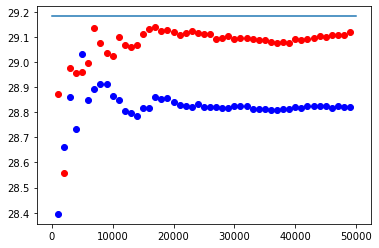

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# function that calculates standard deviation of population in array
def st_dev_p(arr):
    mu = np.mean(arr)  # assign mean of array to variable mu
    
    d = 0              # loop that calculates d, the sum of the squared differences from the mean
    for n in arr:
        d = d + ((n - mu)**2)
        
    v = d/len(arr)    # divide d by length of array to find the variance, and assign to variable v
    sigma = np.sqrt(v) # find square root of variance which is the standard deviation of population
    return sigma


# function that calculates estimate of population standard deviation based on sample data
def st_dev_s(arr):
    
    x_bar = np.mean(arr)   # assign mean of array to variable mu
    
    d = 0       # loop that calculates d, the sum of the squared differences from the mean
    for n in arr:
        d = d + ((n - x_bar)**2)
        
    v = d/(len(arr) - 1)       # divide d by length of array - 1 to find the variance, and assign to variable v
    s = np.sqrt(v)      # find square root of variance which is estimate of standard deviation of population based on sample data
    return s

    
arr = np.random.randint(0, 100, 500)  # simulate a population of 500 numbers between 1 and 100 with a uniform distribution
x = [0,50000]                       # plot the population standard deviation on a straight line
y = [st_dev_p(arr),st_dev_p(arr)]
plt.plot(x, y)


sample = []
for x in range(1,50):
    for i in range (10 * x):     # for n = 10, 20, 30 ......500
        z = np.random.choice(arr, 50)     # sample 50 values from the population
        sample.append(st_dev_s(z))        # find the estimated standard deviation of pop using st_dev_s
    w = np.mean(sample)                   # find the mean of n such estimates and plot
    plt.scatter ((1000*x), w, color = "red")

sample = []            # repeat above using st_dev_p
for x in range(1,50):
    for i in range (10 * x):
        z = np.random.choice(arr, 50)
        sample.append(st_dev_p(z))
    w = np.mean(sample)
    plt.scatter ((1000*x), w, color = "blue")


We can see from the graph that the mean of the estimated standard deviations provided by the st_dev_s function (red dots) give a much more accurate estimate of the population standard deviation (blue line) than the mean of the estimated standard deviations provided by the st_dev_p function (blue dots). We can conclude that that the st_dev_s calculation is a better estimate for the standard deviation of a population when performed on a sample.

### References:
Wikipedia: Standard Deviation https://en.wikipedia.org/wiki/Standard_deviation  
Standard Deviation and Variance https://www.mathsisfun.com/data/standard-deviation.html#WhySquare  
Standard Deviation https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php  
Wikipedia: Bessel's Correction https://en.wikipedia.org/wiki/Bessel%27s_correction  

## Task 4

###  Use scikit-learn to apply k-means clustering to Fisher’s Iris data set.

First I imported all of the relevant packages and read in the dataset. I plotted all of the iris features against each other in a scatter plot matrix. The plot of petal width against petal length, when colour coded by species, shows that a line can be drawn on the graph to separate all instances of setosa from the other two classes. Virginica and versicolor can almost, but not quite, be separated. I concluded that applying k-means clustering to these data could provide us with some accurate predictions for new data[1]. 

In [6]:
# Numerical arrays.
import numpy as np
import pandas as pd

# Machine learning - KMeans.
import sklearn.cluster as skcl

# Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

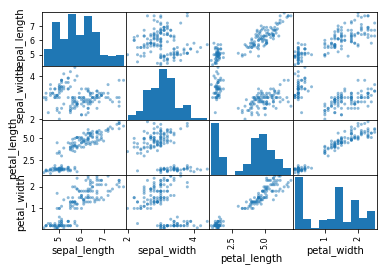

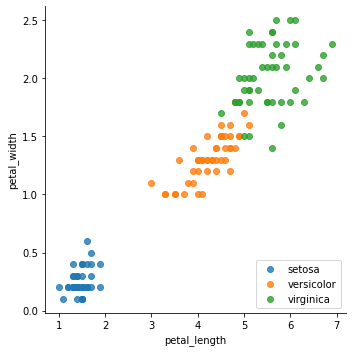

In [7]:
# read in data from csv file
iris = pd.read_csv("iris_dataset.csv")
# plot scatter matrix
pd.plotting.scatter_matrix(iris)
# plot of petal length against width, colour coded by species
sns.lmplot(x = "petal_length", y = "petal_width", data = iris, fit_reg = False, hue = "species",legend = False )
plt.legend(loc = "lower right")

I extracted the data for petal length and width from the dataset and performed a k-means fitting with 3 clusters. The k-means algorithm works by minimising the sum of the squared distances from the cluster points to the mean point of the cluster, and partitioning the data based on this. It applied the  labels 0, 1 or 2 to each of the 150 data points. I plotted these points and colour coded by label. We can see that the resulting plot of the predicted clusters looks very similar to that of the original data coded by species. This gives me confidence that the algorithm has been effective in clustering similar data together[2][3].

In [8]:
# extract petal length and width from dataset
irisb = iris.to_numpy()
X = irisb[:151, 2:4]
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)
# output labels assigned by algorithm
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

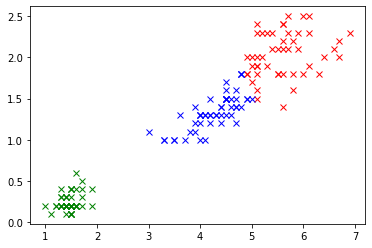

In [9]:
# plot data colour coded by label
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'bx')

Comparing plots has given an indication that the algorithm has, in the main, clustered instances of the same species. However, I wanted to use an objective metric to measure the accuracy of the algorithm. I chose to use the homogeneity score from sklearn.metrics, which measures the extent to which clusters contain only data points which are members of a single class. I also obtained the completeness score, which measures the extent to which members of a given class are elements of the same cluster. Both score between 0 and 1, 1 standing for perfectly homogenous/complete labelling. The scores obtained by these algorithms again show effectiveness of the algorithm in clustering instances of the same species [4][5][6]. 

In [10]:

from sklearn.metrics.cluster import homogeneity_score,completeness_score
true_labels = irisb[:151, 4]
pred_labels = kmeans.labels_
display(homogeneity_score(true_labels, pred_labels))
display(completeness_score(true_labels, pred_labels))


0.8639756867013153

0.8643954288752762

The following code establishes the mean point of each cluster. They are shown as black dots on the plot. 

In [11]:
# The centres of clusters.
mycent = kmeans.cluster_centers_
mycent

array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

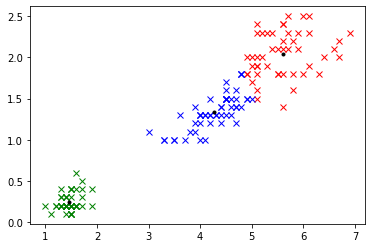

In [16]:
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'bx')
plt.plot(mycent[:,0], mycent[:,1], 'k.')

Predictions of species of Iris, given petal length and width, can be made by assigning the new values to the cluster for which distance from the mean point is minimised. The following code predicts species of iris for flowers with petal length of 2cm and width of 1cm; length 6cm width 2cm; length 5cm width 1cm. It plots these new data points using colour coded dots. 

In [17]:
# Predict the cluster for three points.
newvals = np.array([[2, 1], [6, 2], [5, 1]])
predictions = kmeans.predict(newvals)
predictions

array([0, 1, 2])

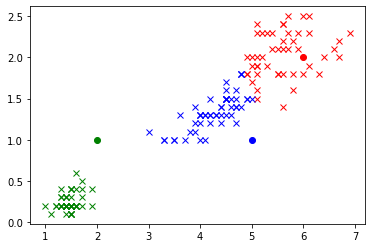

In [18]:
# Plot the data set.
plt.plot(X[kmeans.labels_ == 0][:,0], X[kmeans.labels_ == 0][:,1], 'gx')
plt.plot(X[kmeans.labels_ == 1][:,0], X[kmeans.labels_ == 1][:,1], 'rx')
plt.plot(X[kmeans.labels_ == 2][:,0], X[kmeans.labels_ == 2][:,1], 'bx')
plt.plot(newvals[predictions == 0][:,0], newvals[predictions == 0][:,1], 'go')
plt.plot(newvals[predictions == 1][:,0], newvals[predictions == 1][:,1], 'ro')
plt.plot(newvals[predictions == 2][:,0], newvals[predictions == 2][:,1], 'bo')

### References:

[1] The Python Graph Gallery  https://python-graph-gallery.com/43-use-categorical-variable-to-color-scatterplot-seaborn/  
[2] Scikit Learn Documentation: K-Means https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans  
[3] Medium: Predicting Iris Flower Species With K-Means Clustering In Python https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee  
[4] Scikit Learn Documentation:Completeness Score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score  
[5] Scikit Learn Documentation:Homogeneity Score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score  
[6] Stack Overflow https://stackoverflow.com/questions/51320227/determining-accuracy-for-k-means-clustering  

### End